In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

print(os.getcwd() )

/Users/matt/Projects/training/ds_training/data_manipulation_in_python/section-3


In [6]:
df= pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Bar Plots

In [7]:
#pandas
chest_pain = df.groupby(by="cp").median().reset_index()
chest_pain

,cp,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,57.0,1.0,130.0,248.0,0.0,0.0,143.0,1.0,1.2,1.0,1.0,3.0,0.0
1,1,52.0,1.0,128.0,238.0,0.0,1.0,163.5,0.0,0.0,2.0,0.0,2.0,1.0
2,2,53.0,1.0,130.0,233.0,0.0,1.0,158.0,0.0,0.5,2.0,0.0,2.0,1.0
3,3,59.0,1.0,140.0,234.0,0.0,0.0,159.0,0.0,1.2,1.0,0.0,2.0,1.0


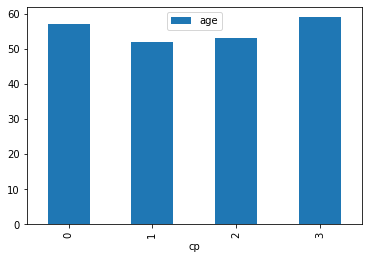

In [8]:
chest_pain.plot.bar(x="cp", y="age");

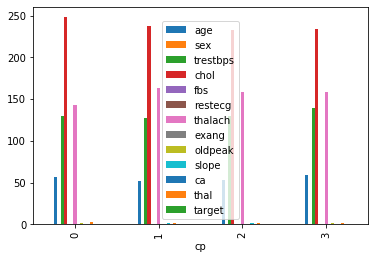

In [9]:
chest_pain.plot.bar(x="cp");

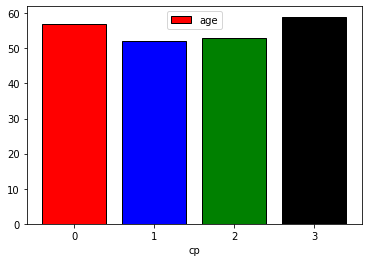

In [10]:
#matplotlib
fig, ax = plt.subplots()
ax.bar(chest_pain["cp"], chest_pain["age"], label="age",
        edgecolor="k", color=["red", "blue", "green", "black"])
ax.set_xlabel("cp")
ax.set_xticks(chest_pain["cp"]);
ax.legend();


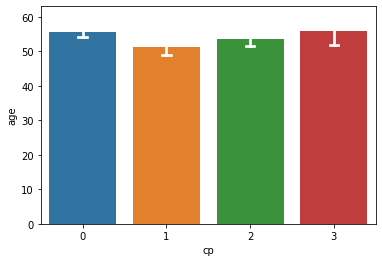

In [11]:
#seaborn
#calculates the median and error bars
ax = sb.barplot("cp", "age", errcolor="w", capsize=0.1, data=df)

## Scatter Plots

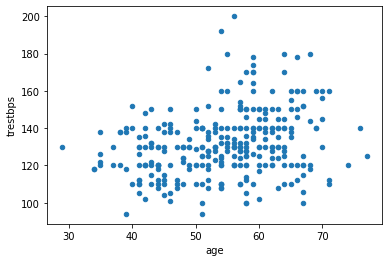

In [12]:
df.plot.scatter("age","trestbps")

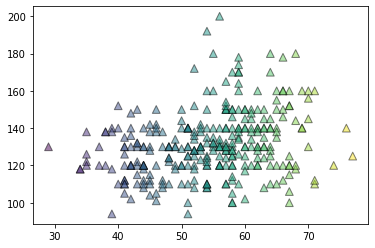

In [13]:
#maplotlib
fix, ax = plt.subplots()
ax.scatter(df["age"], df["trestbps"], 
           marker="^", s=60, c=df["age"],
           edgecolors="k", alpha=0.5);


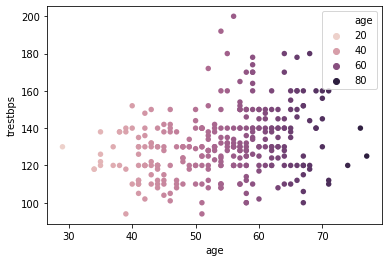

In [14]:
#seaborn
sb.scatterplot("age", "trestbps", hue="age", 
               s=30, edgecolor="none", data=df);

## Line Plots

In [15]:
#pandas
ages = df.groupby("age").median().reset_index()
ages.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.00,2.0,0.0,2.0,1.0
1,34,0.5,2.0,118.0,196.0,0.0,0.5,183.0,0.0,0.35,2.0,0.0,2.0,1.0
2,35,1.0,0.0,124.0,195.0,0.0,1.0,165.0,0.5,0.70,2.0,0.0,2.5,0.5
3,37,0.5,2.0,125.0,232.5,0.0,1.0,178.5,0.0,1.75,1.0,0.0,2.0,1.0
4,38,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.00,2.0,4.0,2.0,1.0


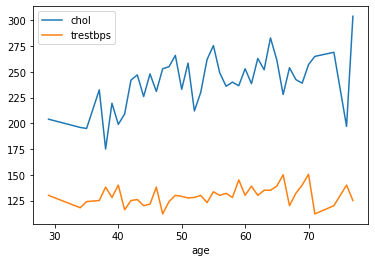

In [16]:
ages.plot.line("age", ["chol", "trestbps"]);

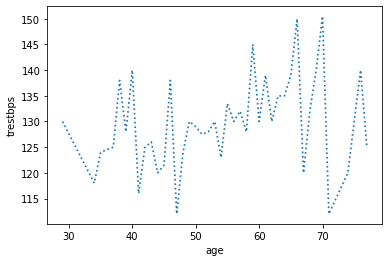

In [17]:
#matplotlib
fix, ax = plt.subplots()
ax.plot(ages["age"], ages["trestbps"], ls=":", lw=1.7)
ax.set_xlabel("age")
ax.set_ylabel("trestbps");

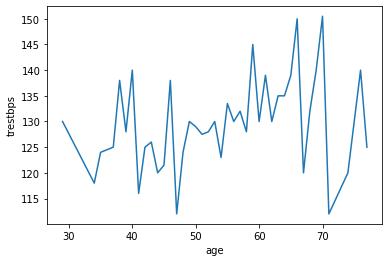

In [18]:
#seaborn
sb.lineplot("age", "trestbps", data=ages);

## Pandas Vs Matplotlib

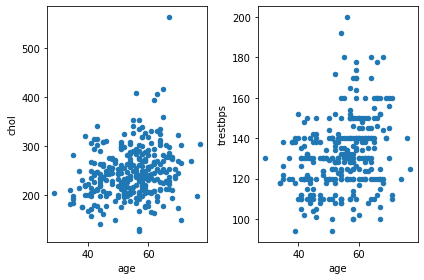

In [19]:
fig, axes = plt.subplots(ncols=2)
df.plot.scatter(x="age", y="chol", ax=axes[0])
df.plot.scatter(x="age", y="trestbps", ax=axes[1])
fig.tight_layout();

In [23]:
fig2 = axes[0].get_figure()
fig2.savefig("plots.png", dpi=100, bbox_inches="tight", transparent=True) #png
fig2.savefig("plots.pdf", bbox_inches="tight") #pdf

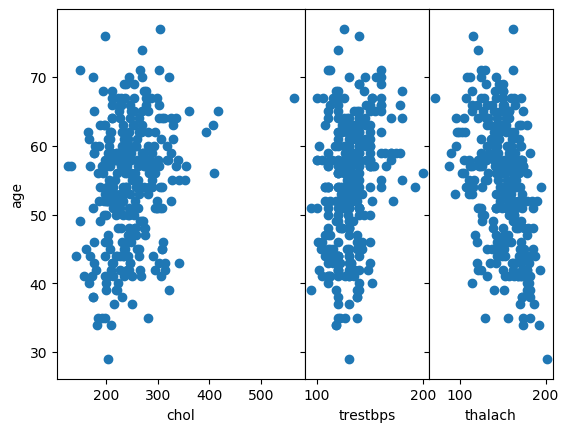

In [22]:
#advanced formatting with matplotlib
with plt.style.context("default"):
    fig, axes = plt.subplots(ncols=3, sharey=True,
                gridspec_kw={"width_ratios": [2,1,1], "wspace": 0})
    y = "age"
    xs = ["chol", "trestbps", 'thalach']
    for x, ax, in zip(xs, axes):
        ax.scatter(df[x], df[y])
        ax.set_xlabel(x)
        axes[0].set_ylabel(y)

## Visualizing 1D Distributions
### Histograms

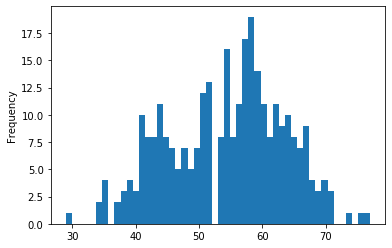

In [30]:
df.age.plot.hist(bins=50);

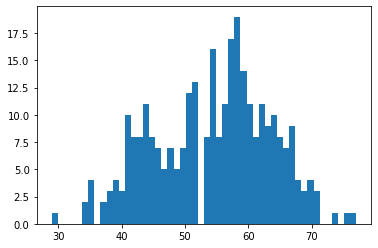

In [29]:
#matplotlib
plt.hist(df.age, bins=50);

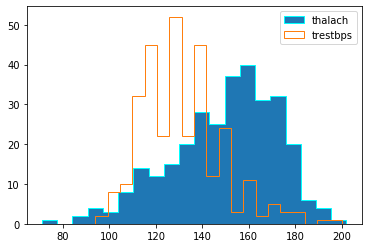

In [44]:
#matplotlib custom
fig, ax = plt.subplots()
ax.hist(df.thalach, bins=20, histtype="stepfilled", 
        label="thalach", alpha=1, edgecolor="cyan")
ax.hist(df.trestbps, bins=20, histtype="step", label="trestbps")
ax.legend();

## Box Plots
Shows mean, quartiles, IQR, and outliers

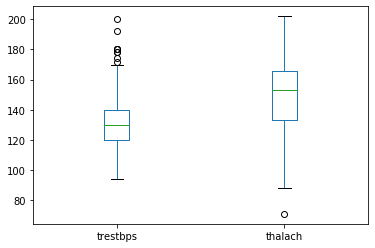

In [48]:
#pandas
df[["trestbps", "thalach"]].plot.box();

#whiskers go out to 1.5 times distance of the quartile ranges or to end of data
#circles denote outliers

In [46]:
df[["trestbps", "thalach"]].describe()

,trestbps,thalach
count,303.000000,303.000000
mean,131.623762,149.646865
std,17.538143,22.905161
min,94.000000,71.000000
25%,120.000000,133.500000
50%,130.000000,153.000000
75%,140.000000,166.000000
max,200.000000,202.000000


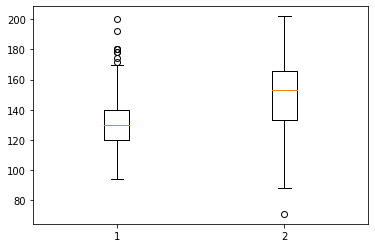

In [47]:
#matplotlib
plt.boxplot(df[["trestbps", "thalach"]].to_numpy());

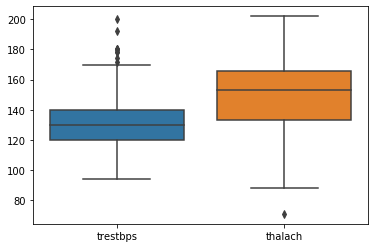

In [50]:
#seaborn
sb.boxplot(data=df[["trestbps", "thalach"]]);

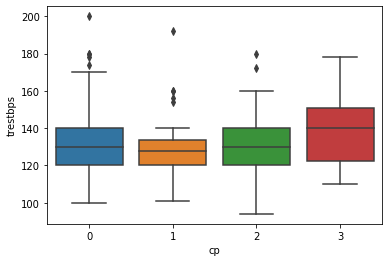

In [53]:
#use seaborn to do a group by boxplot
sb.boxplot(x="cp", y="trestbps", data=df);

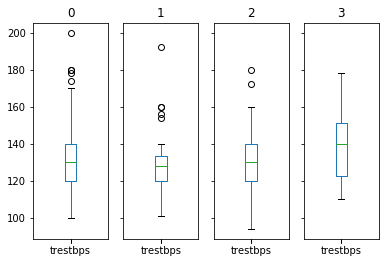

In [64]:
#pandas groupby
df.groupby("cp").boxplot(column="trestbps", sharex=True, 
                         layout=(1,4), grid=False);

## Violin Plots

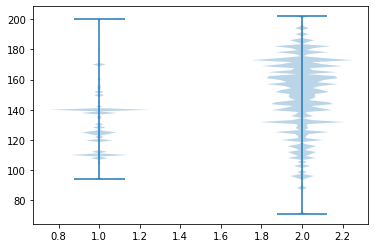

In [68]:
#matplotlib
fig, ax = plt.subplots()
ax.violinplot(df[["trestbps", "thalach"]].to_numpy(), bw_method=.01);

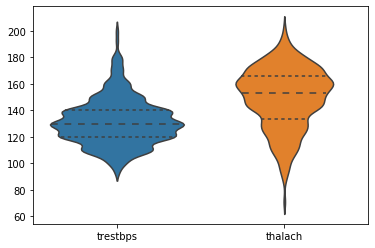

In [72]:
#seaborn
sb.violinplot(data=df[["trestbps", "thalach"]], inner="quartile", bw=.2);

## Bee Swarm Plots

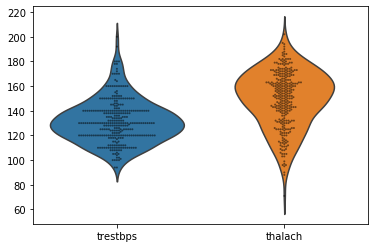

In [75]:
#seaborn
sb.violinplot(data=df[["trestbps", "thalach"]],  inner=None);
sb.swarmplot(data=df[["trestbps", "thalach"]], size=2, color="k", alpha=.5)

## Visualizing 2D Distributions
### Histograms

In [80]:
df = pd.read_csv("meteorite-landings.csv")
df.head()
df= df.dropna(subset=["reclong", "reclat"])
df = df[df.reclong < 300]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38400 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38400 non-null  object 
 1   id           38400 non-null  int64  
 2   nametype     38400 non-null  object 
 3   recclass     38400 non-null  object 
 4   mass         38282 non-null  float64
 5   fall         38400 non-null  object 
 6   year         38225 non-null  float64
 7   reclat       38400 non-null  float64
 8   reclong      38400 non-null  float64
 9   GeoLocation  38400 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


### 2D Histograms

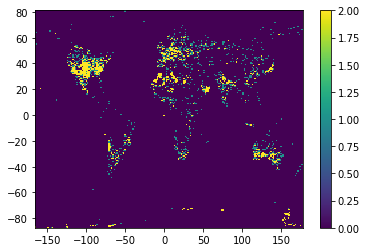

In [82]:
#matplotlib
plt.hist2d(df.reclong, df.reclat, bins=200, vmax=2)
plt.colorbar();

### 2D Hex Plots

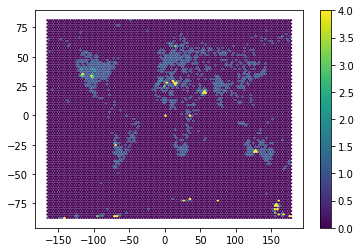

In [93]:
#matplotlib
plt.hexbin(df.reclong, df.reclat, bins=200, vmax=4, lw=0)
plt.colorbar();

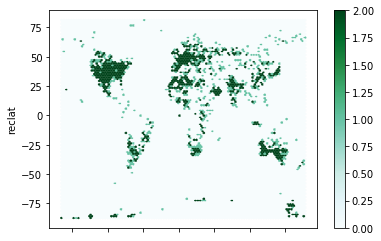

In [97]:
#pandas
df.plot.hexbin(x="reclong", y="reclat", vmax=2, gridsize=100, linewidth=.25);

In [ ]:
### Contour Plots